In [13]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import timeit
import time

#read and display slang dataset
df = pd.read_csv("projectData/slang.csv", sep=',')
df

,Unnamed: 0,acronym,expansion
0,0,2day,today
1,1,2m2h,too much too handle
2,2,2moro,tomorrow
3,3,2nite,tonight
4,4,4eae,for ever and ever
...,...,...,...
3352,3352,yw,you are welcome
3353,3353,ywca,young womens christian association
3354,3354,ywimc,your wish is my command
3355,3355,ywsyls,you win some you lose some


In [14]:
#Hashtable that will be used inside the method. Creating it outside saves us from creating the hashTable each time the method is called
hashTable = dict(zip(df["acronym"], df["expansion"])) 

In [15]:
def acronyms(sentence: str) -> str: #Takes an input and output of a string
    wordList = sentence.split(" ") #splits string into a list seperated by spaces
    
    for word in range(len(wordList)):
        if wordList[word] in hashTable: #if the word is a key in the hashtable, convert it to the long english form
            wordList[word] = hashTable[wordList[word]]
            
    output = ' '.join(wordList) #Groups the list of word back into a single string
    return output

In [16]:
acronyms("Hello ywu") #test case

'Hello yo waz up'

In [17]:
#read dataset to be processed
df2 = pd.read_csv("projectData/age.of.civilizations.jakowski.csv", sep=',')
df2 = df2.notnull()


In [18]:
df2.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,True,True,True,True,True,True,True,True,False,False
1,True,True,True,True,True,True,True,True,False,False
2,True,True,True,True,True,True,False,True,False,False
3,True,True,True,True,True,True,True,True,False,False
4,True,True,True,True,True,True,True,True,False,False


In [19]:
ts = []
#Helper function to record time spent by iteration, stored in ts

def replace():
    start = time.time()
    print(start)
    for index, row in df2.iterrows():
        acronyms(row['content'].astype(str))
        end = time.time()
        ts.append(end - start)
        

1681189383.38


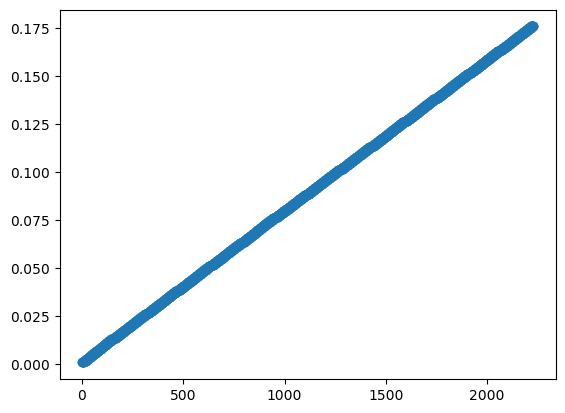

In [20]:
replace()
#Plot time complexcity

x = range(1, len(ts)+1)
plt.scatter(x, ts)